# NLP Games Description

## Steps

In [ ]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Downloading nltk-3.7-py3-none-any.whl (1.5 MB)
Collecting tqdm
 Downloading tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
Collecting click
 Downloading click-8.1.3-py3-none-any.whl (96 kB)
Collecting regex>=2021.8.3
 Downloading regex-2022.4.24-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (764 kB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (1.0.1)
Installing collected packages: tqdm, regex, click, nltk
Successfully installed click-8.1.3 nltk-3.7 regex-2022.4.24 tqdm-4.64.0
Python interpreter will be restarted.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Package omw-1.4 is already up-to-date!
Out[20]: True

### Calling Snowflake

In [ ]:
# snowflake connection options
options = {
"sfUrl": "snowflakecomputing.com",
"sfUser": "",
"sfPassword": "",
"sfDatabase": "",
"sfSchema": "",
"sfWarehouse": ""
}

In [ ]:

# Build Query
sql_query = f"""
SELECT
*  from "VW_GAME_DESCRIPTION_MASTER" WHERE GAMETITLE is not NULL
"""
# Generate a simple dataset
df = spark.read \
.format("snowflake") \
.options(**options) \
.option("query", sql_query ) \
.load()

df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 TITLE| GAMEDESCRIPTION| GAMEINSTRUCTIONS| GAMETITLE| SEODESCRIPTION| SEOKEYWORDS| SEOTITLE|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 40_joker_staxx|<p>Are you a fan ...|<p>This classic s...|CLASSIC ONLINE SL...|Recall the experi...|casino slots, cla...|Classic Free Onli...|
 7diamond_c6a|<p>One of the mos...|<p>7 DIAMOND is a...|7 Diamond - FREE ...|Relive the experi...|7 Diamond, crista...|7 Diamond - Crist...|
 9_happy_pharaohs|<p>The team of an...|<p>In this slot y...|Slot Machine Casi...|Meet a never-befo...| null|9 Happy Pharaohs ...|
 alkemors_tower|<p>You don't need...|<p>Dust off your ...|Video Slot Magic ...|There is plenty o...|video slot, slot ...|Alkemor's Towers ...|
 anubis|<p>If you like th...|<p>In this free s...|ANUBIS: PLAY ONLI...|Play free online ...|free online slot ...|Free online slot ...|
 art_of_the_heist|<p>Help Vincenzo ...|<p>In this slot m...|SLOT MACHINE WITH...|Learn from the be...|slots casino, Art...|Art of the Heist ...|
 blackjack|<p>Blackjack is a...|<p>When the game ...|21 European Black...|Who hasn’t played...|poker, blackjack,...|Blackjack Online ...|
 blackjack_us|<p>Blackjack is a...|<p>When the game ...|21 European Black...|Who hasn’t played...| null|Blackjack Online ...|
 blazeofra|<p>The powerful G...|<p>In this video ...|EGYPTIAN VIDEO SL...|Use the Sun God's...| null|Blaze of Ra - Egy...|
 blood_eternal|<p>If you like sl...|<p>This video slo...|Vampire Video Slo...|Spin the 6 reels ...| null|Blood Eternal - V...|
 book_of_gold|<p>The mysterious...|<p>In this slot m...|Free 5-reel Slot ...|Enjoy playing Boo...|slots casino, Boo...|Free 5-reel Slot ...|
 book_of_gold_choice|<p>Ancient Egypt ...|<p>In this slot m...|Egyptian Slot - B...|Enjoy playing the...| null|Ancient Egyptian ...|
book_of_gold_mult...|<p>Take a trip to...|<p>Book Of Gold: ...|Book Of Gold: Mul...|Travel to ancient...|book of gold, mul...|Book Of Gold: Mul...|
 buffalo_power|<p>Relive the wil...|<p>In this online...|Buffalo Power - W...|Have you ever wan...| null|Buffalo Power - W...|
 bumper_crop|<p>Do you like th...|<p>This slot cons...|FARM SLOT MACHINE...|Become a powerful...| null|Bumper Crop - Far...|
 burlesque_queen|<p>Do you know th...|<p>In this slot m...|Free Casino Slot ...|The Moulin Rouge ...|casino slots, cas...|Casino Slots Onli...|
 burning_wins|<p>Do you love cl...|<p>This classic s...|CLASSIC SLOT MACH...|Relive the experi...|casino slots, cla...|Burning Wins - Cl...|
 carnaval_forever|<p>Did you know t...|<p>Carnaval Forev...|Carnaval Rio de J...|Join the Brazilia...|carnival forever,...|Carnaval Forever ...|
 chicago_gangsters|<p>Chicago Gangst...|<p>In this video ...|VideoSlots Free O...|Travel back in ti...|video slots, vide...|VideoSlots Free O...|
 christmas_eve|<p>Yo-ho-ho! Chri...|<p>This Christmas...|Christmas VIDEO S...|Christmas Eve is ...|casino slots, vid...|Christmas Eve - C...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

### Importing Libraries

In [ ]:
pip install gensim

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import remove_stopwords
from textblob import TextBlob, Word
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud
import seaborn as sn
from sklearn.metrics import silhouette_score


### Transformations

In [ ]:
Dataset = df.toPandas()


In [ ]:
Dataset['Combine'] = Dataset["GAMEDESCRIPTION"]+Dataset['GAMEINSTRUCTIONS']

In [ ]:
print(Dataset['Combine'])

0 <p>Are you a fan of classic casino slot machin...
1 <p>One of the most famous bar slot machines in...
2 <p>The team of ancient rulers is the main feat...
3 <p>You don't need to be a wizard to enjoy Alke...
4 <p>If you like the mysteries of the Ancient Eg...
 ... 
174 <p>Elves don't enjoy holidays on Christmas! Ha...
175 <p>Step into the cold winter with the eccentri...
176 <p>Surf an avalanche of prizes in Yetimania!</...
177 <p>The gods of Olympus, Hermes, Hera and Zeus,...
178 <p>The walking dead are awakening... they are ...
Name: Combine, Length: 179, dtype: object

In [ ]:
#ListDesc = Dataset['Combine'].iloc[:].tolist()
#Description = ' '.join(ListDesc)
print(Dataset['Combine'][80])
#costum stop words ll, nbsp

<p>Lava Gold takes you to a volcanic island, a world of huge, creepy dinosaurs. Set off on a dinosaur egg hunt across the steaming grounds of the archipelago and try not to get caught in the clutches of the flying Pterodactyl or the fearsome T-Rex. Let the tangle of branches and leaves guide you to the VOLCANO, which is a wild symbol!</p><p>This Slot consists of 5 reels, 5 rows and the game pays out in groups. Any group of 5 or more of the same symbol is a winning group.</p><p><br></p><p>Winning groups disappear from the 5x5 panel, leaving empty positions. Any symbol can expand, with the possibility of creating more winning combinations!&nbsp;</p><p><br></p><p>This process repeats until there are no winning groups left or until the panel is filled with 1 identical symbol.</p><p><br></p><p><strong>Free Spins</strong></p><p><br></p><p>To activate the FREE SPINS mode, get a winning group of all symbols except the VOLCANO, computerised from lowest to highest value, to fill the Lava Meter.</p><p><br></p><p>When all 10 cells of the Lava Meter are filled, you get 10 FREE SPINS!</p><p><br></p><p>During Free Spins mode, the symbols in the centre column of the panel will be identical, awarding a guaranteed prize!</p><p><br></p><p>Symbols do not expand to empty positions during Free Spins mode. Win multipliers increase by 1 during the FREE SPINS mode, starting at x1 on any group win for your first FREE SPIN, and going up to x10 for the last FREE SPIN win!</p><p><br></p><p><strong>Volcano Wilds</strong></p><p><br></p><p>The VOLCANO symbol is a wild symbol and substitutes for all symbols.</p><p><br></p><p>Remember, use the 3 dots button to open the game menu, the "i" for paytable information and the volume button to mute the game.</p><p><br></p><p><strong>Other general Lava Gold indicators</strong></p><p><br></p><p>-"+" button: Allows you to increase the bet.</p><p><br></p><p>-"-" button: Decreases the bet</p><p><br></p><p>-Spin button: Starts the spin.</p><p><br></p><p>-Auto: Enables the option to play in automatic mode.</p><p><br></p><p>Do you dare with the fearsome T-Rex?</p><p><br></p><p><br></p><p><br></p>

In [ ]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    ret  = re.sub(clean, '', text)
    return ret


In [ ]:
def lower(text):
  return text.lower()

In [ ]:
new_stopwords = [x for x in stopwords.words() if x != 'you']

In [ ]:
def removeStopWords(text):
  return  [word for word in text if not word in new_stopwords]
  # remove_stopwords(text)

In [ ]:
def lemmanize(text):
  sent = TextBlob(text)
  return " ". join([w.lemmatize() for w in sent.words])


In [ ]:
def tok(text):
  return list(tokenize(text))
 

In [ ]:
#Deleting common words. Whaat would happen
def removeSpecialWords(text):

  mystopwords = ['ll', 'nbsp','slot', 'machine', 'game', 'get']
 
  for word in list(text):  # iterating on a copy since removing will mess things up
      if word in mystopwords:
          text.remove(word)

  return text


#### Preprocessing Function

In [ ]:

def Preprocessing(Description):
  CleanDesc = remove_html_tags(Description)
  CleanDesc = lower(CleanDesc)
  CleanDesc = tok(CleanDesc)

  filtered_sentence = removeStopWords(CleanDesc)
  
  lemmatized_out = lemmanize(' '.join(filtered_sentence))
  #lem =tok(filtered_sentence)
  lem =  removeSpecialWords(lemmatized_out.split())
  return lem 
lem = Preprocessing(Dataset['Combine'][133])


In [ ]:
print(lem)

['enjoy', 'show', 'magician', 'arranges', 'reel', 'favour', 'allows', 'you', 'watch', 'mystery', 'box', 'reward', 'you', 'free', 'spin', 'powerful', 'magical', 'effect', 'lurk', 'beneath', 'place', 'you', 'dare', 'explore', 'look', 'special', 'attribute', 'enhance', 'free', 'spin', 'mode', 'magician', 'might', 'even', 'nudge', 'reel', 'enhance', 'winning', 'tell', 'anyone', 'tell', 'anyone', 'secret', 'stacked', 'reel', 'paylines', 'pay', 'left', 'right', 'highest', 'win', 'pay', 'line', 'multiple', 'win', 'different', 'paylines', 'added', 'together', 'payouts', 'shown', 'according', 'bet', 'selected', 'secret', 'trickwhen', 'trick', 'performed', 'random', 'number', 'mystery', 'card', 'added', 'reel', 'reel', 'stop', 'card', 'magically', 'turn', 'return', 'symbol', 'shht', 'tell', 'anyone', 'secret', 'reset', 'trickthe', 'magician', 'opportunity', 'reset', 'reel', 'favour', 'restore', 'trick', 'occur', 'spin', 'win', 'winning', 'event', 'wizard', 'randomly', 'selects', 'symbol', 'reel', 'turn', 'stack', 'symbol', 'value', 'multiplied', 'x', 'comodin', 'symbol', 'chosen', 'payout', 'equal', 'highest', 'valued', 'symbol', 'prestidigitationthe', 'wizard', 'opportunity', 'nudge', 'reel', 'award', 'potential', 'win', 'mystery', 'wildsif', 'you', 'land', 'mystery', 'box', 'joker', 'symbol', 'position', 'reel', 'you', 'rewarded', 'free', 'spin', 'deck', 'turned', 'upside', 'reel', 'position', 'turned', 'upside', 'select', 'number', 'position', 'reel', 'number', 'equal', 'number', 'joker', 'symbol', 'activated', 'free', 'spin', 'mode', 'wild', 'symbol', 'position', 'selecting', 'position', 'free', 'spin', 'mode', 'begin', 'powerful', 'magical', 'effect', 'hidden', 'underneath', 'position', 'you', 'dare', 'explore', 'magic', 'multiplier', 'multiplier', 'add', 'x', 'x', 'x', 'total', 'winning', 'awarded', 'free', 'spin', 'mode', 'base', 'multiplier', 'x', 'spectacular', 'spin', 'add', 'extra', 'free', 'spin', 'total', 'instant', 'win', 'instantly', 'award', 'cash', 'payout', 'x', 'x', 'x', 'current', 'bet', 'free', 'spin', 'mode', 'prismatic', 'roller', 'cause', 'entire', 'reel', 'turn', 'wild', 'symbol', 'free', 'spin', 'mode', 'wild', 'symbol', 'substitute', 'symbol', 'use', 'volume', 'button', 'mute', 'view', 'instruction', 'general', 'clover', 'rich', 'indicator', 'bet', 'set', 'bet', 'you', 'wish', 'place', 'button', 'allows', 'you', 'increase', 'bet', 'button', 'decrease', 'bet', 'spin', 'button', 'start', 'spin', 'auto', 'enables', 'option', 'play', 'automatic', 'mode', 'you', 'smarter', 'wizard', 'prove', 'play', 'stacked', 'online']

In [ ]:
w1 = Preprocessing(Dataset['Combine'][133])
w2 = Preprocessing(Dataset['Combine'][80])
a = w1
b = w2
c = set(a) & set(b)
print(c)

{'auto', 'x', 'pay', 'general', 'mute', 'substitute', 'start', 'symbol', 'free', 'dare', 'option', 'you', 'winning', 'volume', 'left', 'multiplier', 'spin', 'button', 'bet', 'position', 'use', 'win', 'wild', 'set', 'indicator', 'allows', 'value', 'highest', 'mode', 'decrease', 'play', 'automatic', 'reel', 'increase', 'enables'}

In [ ]:
w1 = Preprocessing(Dataset['Combine'][35])
w2 = Preprocessing(Dataset['Combine'][30])
a = w1
b = w2
c = set(a) & set(b)
print(c)


{'themed', 'festival', 'chinese', 'bet', 'dancing', 'wild', 'you', 'dragon', 'find', 'line', 'fill', 'special', 'asian'}

In [ ]:
w1 = Preprocessing(Dataset['Combine'][20])
w2 = Preprocessing(Dataset['Combine'][2])
a = w1
b = w2
c = set(a) & set(b)
print(c)


{'main', 'every', 'mute', 'symbol', 'free', 'instruction', 'you', 'winning', 'left', 'volume', 'spin', 'special', 'button', 'bet', 'right', 'win', 'use', 'online', 'scatter', 'line', 'appear', 'highest', 'mode', 'play', 'automatic', 'reel'}

In [ ]:
words_text = []
for i in range(0,149):

  words_text.append(Preprocessing(Dataset['Combine'][i]))


In [ ]:
Final_array_text = []
for i in words_text:
    Final_array_text .append(' '.join(i))


In [ ]:
lem = Final_array_text

Out[29]:

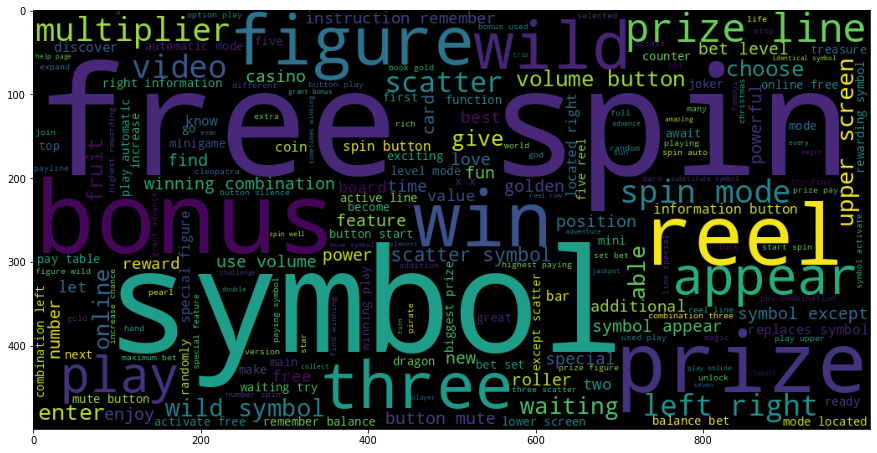

<matplotlib.image.AxesImage at 0x7fef31ac7790>

In [ ]:
unique_string=(" ").join(lem)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
#for i in range(0, len(Dataset['GAMEDESCRIPTION'])):
print(Dataset['Combine'][0])
print(Preprocessing(Dataset['Combine'][0]))

#### APPLYING MODEL BASED TO COUNT AND IDF

### Classification

#### TFIDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can choose to add an ngram_range ngram_range=(2, 2)
vec = TfidfVectorizer()
vec.fit_transform(lem)
vec.get_feature_names()
# we just showing the first Description

array = pd.DataFrame(vec.transform(lem).toarray(), columns=sorted(vec.vocabulary_.keys()))
# We have values of all descriptions

#tf_idf_norm = normalize(new_features)
#tf_idf_array = tf_idf_norm.toarray()


/databricks/python/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
 warnings.warn(msg, category=FutureWarning)

In [ ]:
array

Out[106]:

,ability,able,aboard,abracadabra,absorb,acacia,academy,accelerate,accept,access,accessible,acclaimed,accompanied,according,accordingly,accumulate,accumulated,accumulation,accumulator,accustomed,ace,achieve,achieved,achievement,achievementstokens,aciertas,across,act,acting,action,activar,activate,activated,activates,activating,activation,active,activer,actuarán,actuel,...,wit,witch,within,without,withstand,witness,wizard,wolf,wolflow,wondered,wonderful,wool,work,worker,world,worry,worship,worth,worthless,would,wow,wrong,www,xtreme,yacht,yang,yea,year,yes,yet,yin,you,young,zafira,zebra,zen,zero,zeus,zombie,être
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.053555,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.107938,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.032303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.066453,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.091809,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.131184,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.219098,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.046601,0.020297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.049512,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.139804,0.0,0.0,0.0,0.041755,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.086531,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.052727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.079802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.324687,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065124,0.0,0.0,0.0,0.051550,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.172195,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
145,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.091369,0.049116,0.066363,0.000000,0.0,0.047322,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.076301,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
146,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036560,0.0,0.0,0.0,0.000000,0.000000,0.000000

In [ ]:
docs_transformed = [vec.transform([lem[i]]).toarray() for i in range(149)]

#### Count Word For Class

In [ ]:
def CountingForClass(value, arra):

  alldata2 = []
  for i in range(0,149):
    if arra[i] == value:
      arr = Preprocessing(Dataset['Combine'][i])
      alldata2.append(' '.join(arr))
  x = word_count(' '.join(alldata2))
  return dict(sorted(x.items(), key=lambda item: item[1],reverse = True)[:])

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

#### Euclidean distance between documents.

In [ ]:
from scipy import spatial
distanciaArray = []
distanceCous = []
for i in range(0,149):
  for j in range(0,149):
    print(f'Doc {j} to Doc {20}: {np.linalg.norm(docs_transformed[j] - docs_transformed[20])}')
    distanciaArray.append(np.linalg.norm(docs_transformed[j] - docs_transformed[i]))
    distanceCous.append(spatial.distance.cdist(docs_transformed[j] , docs_transformed[i], 'cosine'))

In [ ]:
my_formatted_list = [ '%.2f' % elem for elem in distanceCous ]
print((my_formatted_list))

Counter({'0.92': 1948, '0.93': 1934, '0.94': 1858, '0.91': 1760, '0.95': 1668, '0.90': 1606, '0.89': 1298, '0.96': 1292, '0.88': 1162, '0.87': 994, '0.86': 826, '0.97': 710, '0.85': 672, '0.84': 496, '0.83': 474, '1.00': 330, '0.82': 314, '0.98': 314, '0.81': 294, '0.80': 278, '0.79': 224, '0.99': 184, '0.78': 174, '0.77': 158, '0.00': 151, '0.76': 118, '0.75': 100, '0.74': 82, '0.73': 70, '0.71': 54, '0.63': 50, '0.70': 50, '0.72': 48, '0.69': 44, '0.65': 40, '0.68': 38, '0.67': 32, '0.62': 32, '0.61': 30, '0.64': 28, '0.59': 26, '0.66': 24, '0.56': 24, '0.58': 18, '0.50': 18, '0.55': 16, '0.54': 16, '0.60': 14, '0.52': 12, '0.57': 10, '0.53': 10, '0.44': 10, '0.41': 8, '0.51': 8, '0.47': 6, '0.16': 4, '0.48': 4, '0.33': 4, '0.38': 4, '0.14': 4, '0.46': 4, '0.15': 2, '0.19': 2, '0.36': 2, '0.20': 2, '0.43': 2, '0.17': 2, '0.40': 2, '0.03': 2, '0.18': 2, '0.45': 2, '0.29': 2})
{151: '0.00', 2: '0.45', 4: '0.48', 8: '0.51', 10: '0.57', 6: '0.47', 18: '0.58', 12: '0.52', 16: '0.55', 24: '0.66', 26: '0.59', 14: '0.60', 30: '0.61', 32: '0.67', 50: '0.70', 28: '0.64', 40: '0.65', 38: '0.68', 44: '0.69', 54: '0.71', 48: '0.72', 70: '0.73', 82: '0.74', 100: '0.75', 118: '0.76', 158: '0.77', 174: '0.78', 224: '0.79', 278: '0.80', 294: '0.81', 314: '0.98', 474: '0.83', 496: '0.84', 672: '0.85', 826: '0.86', 994: '0.87', 1162: '0.88', 1298: '0.89', 1606: '0.90', 1760: '0.91', 1948: '0.92', 1934: '0.93', 1858: '0.94', 1668: '0.95', 1292: '0.96', 710: '0.97', 184: '0.99', 330: '1.00'}
Out[113]:

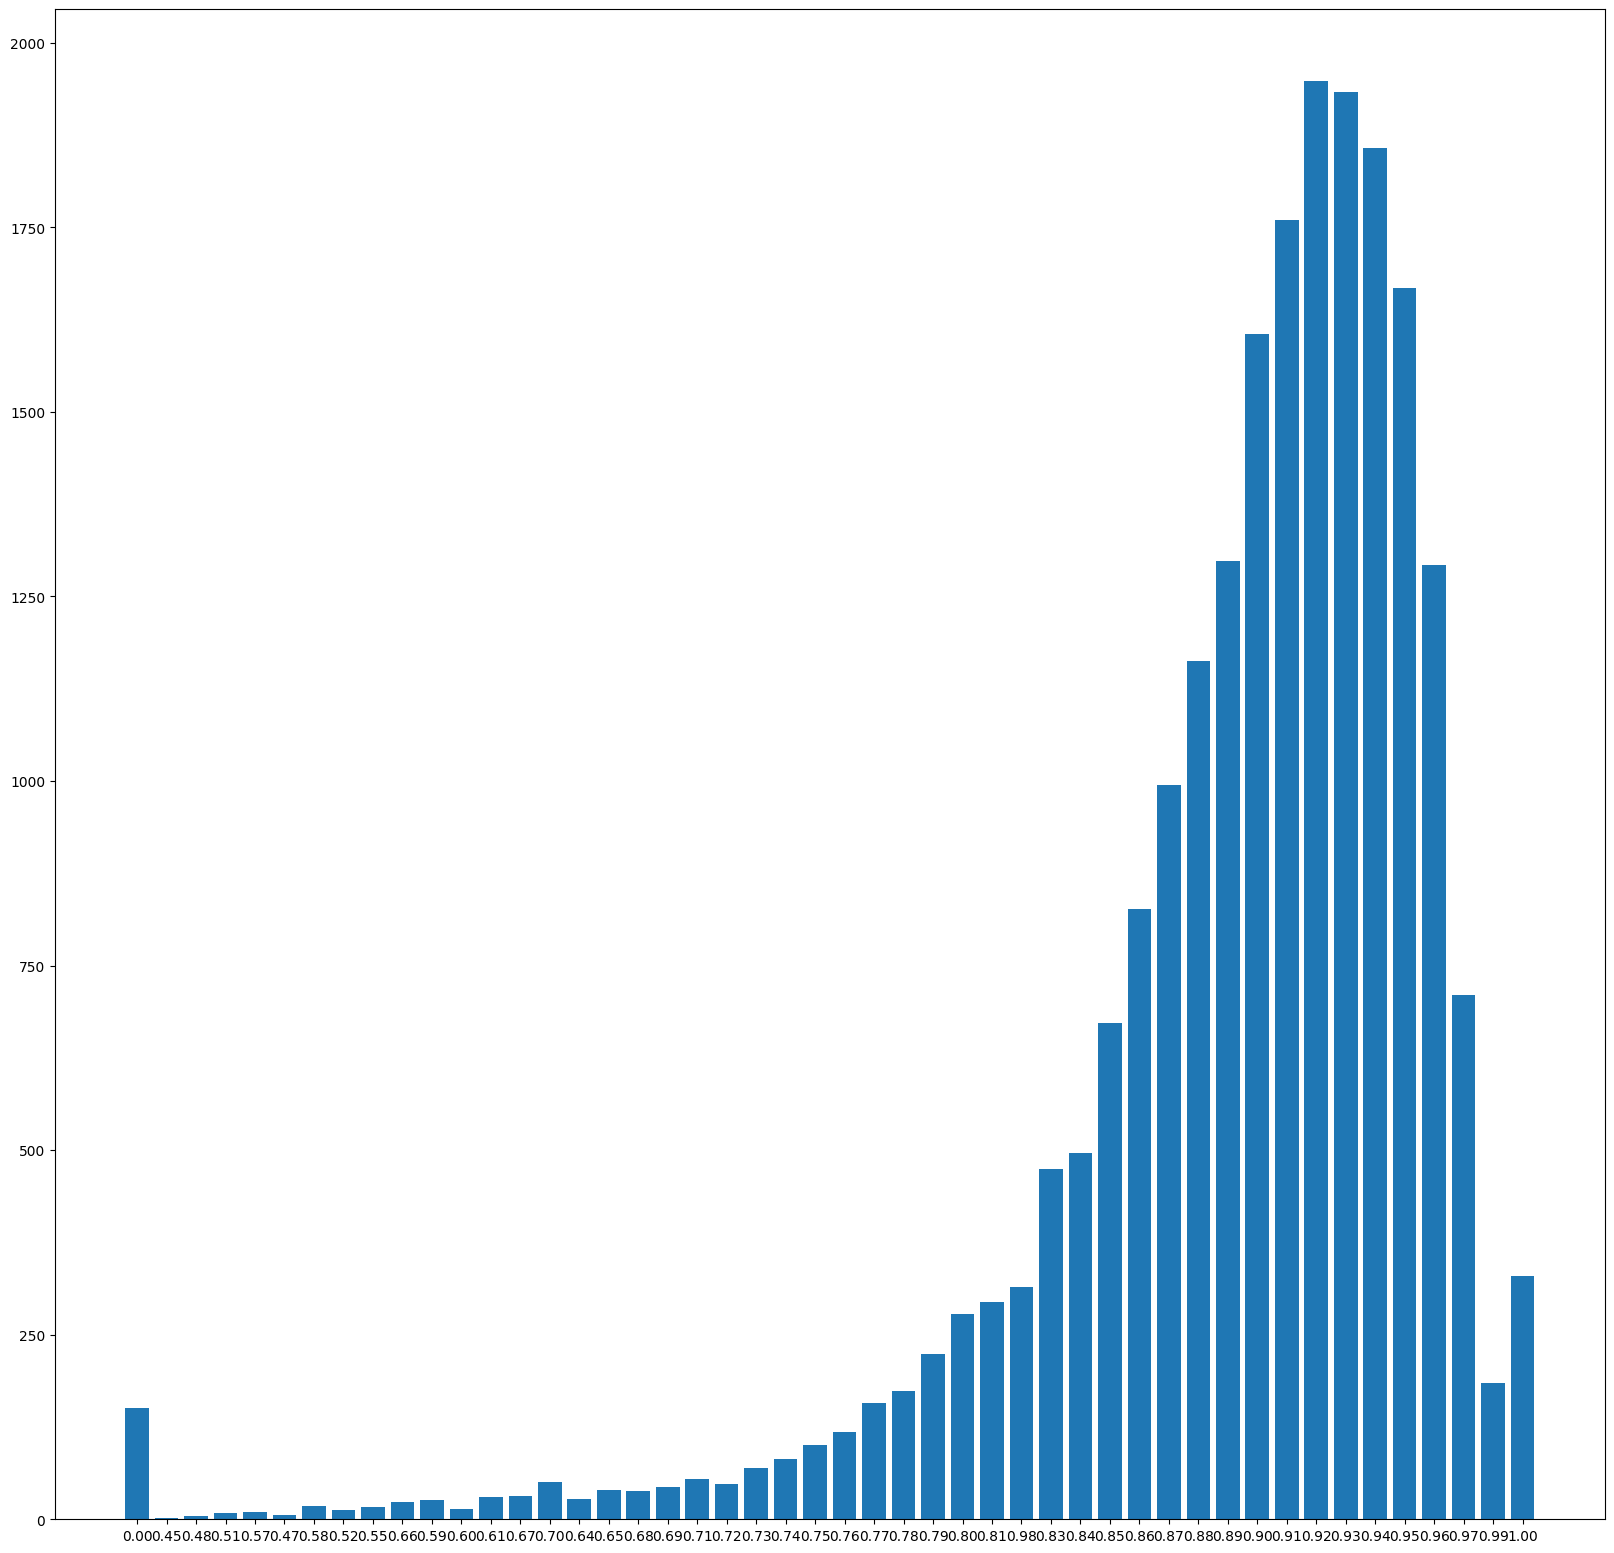

<BarContainer object of 48 artists>

In [ ]:
from matplotlib.pyplot import figure
from collections import Counter

c =  Counter(my_formatted_list)
print(c)

c1 = sorted(c.items())

dct = dict((y, x) for x, y in c1)
print(dct)
figure(figsize=(20, 20), dpi=100)

plt.bar(dct.values(), dct.keys())


#### KMeans without Feature Reduction

In [ ]:

sse = []
k_list = range(1, 20)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(array)
    sse.append([k, km.inertia_])
oca_results_scale = pd.DataFrame({'Cluster': range(1,20), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##### KMeans

In [ ]:
nn = 10
#Initialize the class object
kmeans = KMeans(n_clusters= nn)
kk = kmeans.fit(array)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(array, kk.labels_, metric='euclidean')))
#predict the labels of clusters.
labelNone=  kmeans.fit_predict(array)


KMeans PCA Scaled Silhouette Score: 0.03156603911011284

In [ ]:
print(labelNone)

[4 5 0 6 5 1 9 9 5 5 5 5 5 1 5 1 4 7 1 7 0 3 2 1 1 2 2 5 5 5 6 0 1 1 6 6 3
 0 1 2 2 7 3 5 5 2 3 6 6 3 8 4 4 7 8 8 5 2 2 5 7 5 3 0 5 8 7 4 4 0 0 5 2 2
 2 2 2 2 7 2 0 5 0 2 3 3 1 4 3 2 3 9 3 5 9 4 7 3 5 0 0 3 2 1 7 2 6 5 3 5 5
 8 7 0 5 5 2 5 9 5 7 6 3 4 2 5 5 5 5 5 7 2 5 0 7 8 8 5 7 5 8 4 5 7 5 0 3 5
 7]

##### Counting Words For Each Class

In [ ]:
for i in range(0,nn):
   print("for the class {} :".format(i) ,CountingForClass(i, labelNone), "\n")

In [ ]:
print("For each document what class are they into : \n", labelNone)

count_arr = np.bincount(labelNone)
print(count_arr[0])
print(count_arr[1])
print(count_arr[2])


For each document what class are they into : 
 [4 5 0 6 5 1 9 9 5 5 5 5 5 1 5 1 4 7 1 7 0 3 2 1 1 2 2 5 5 5 6 0 1 1 6 6 3
 0 1 2 2 7 3 5 5 2 3 6 6 3 8 4 4 7 8 8 5 2 2 5 7 5 3 0 5 8 7 4 4 0 0 5 2 2
 2 2 2 2 7 2 0 5 0 2 3 3 1 4 3 2 3 9 3 5 9 4 7 3 5 0 0 3 2 1 7 2 6 5 3 5 5
 8 7 0 5 5 2 5 9 5 7 6 3 4 2 5 5 5 5 5 7 2 5 0 7 8 8 5 7 5 8 4 5 7 5 0 3 5
 7]
14
11
22

###  Pca + KMeans

#### PCA

In [ ]:
print(type(array))

<class 'pandas.core.frame.DataFrame'>

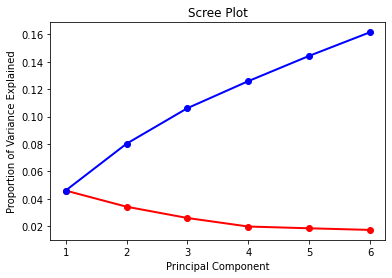

In [ ]:
pca = PCA(n_components =6)
principalComponents = pca.fit(array)
PCA_components = pd.DataFrame(pca.fit_transform(array))

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(PC_values)
plt.ylabel('Proportion of Variance Explained')
plt.show()



ELBOW RULE

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066d8e280>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066d8e280>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066d8e280>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066d8e280>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066d8e280>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.ge

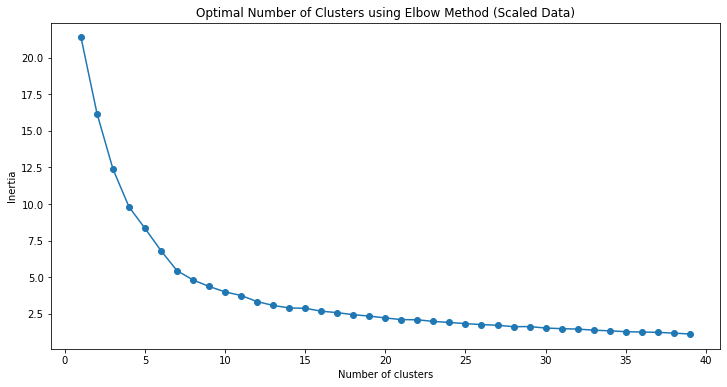

Text(0, 0.5, 'Inertia')

In [ ]:
"""
After PCA here we can see how many K in Kmeans we will need applying the Elbow Method 
using PCA_components. 
"""
sse = []
k_list = range(1, 40)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(PCA_components)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,40), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### KMeans

In [ ]:
"""KMeans based on PCA_components"""
n = 7
#Initialize the class object
kmeans = KMeans(n_clusters= n)
kk = kmeans.fit(PCA_components)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(PCA_components, kk.labels_, metric='euclidean')))
#predict the labels of clusters.
label2=  kmeans.fit_predict(PCA_components)

KMeans PCA Scaled Silhouette Score: 0.3638230042077288

In [ ]:
print("For each document what class are they into : \n", label2)

count_arr = np.bincount(label2)
print(count_arr[0])
print(count_arr[1])
#print(count_arr[2])


For each document what class are they into : 
 [0 1 1 4 6 4 4 4 6 4 6 6 6 1 4 1 0 4 1 4 1 2 5 1 1 5 5 2 4 4 4 1 1 1 4 4 2
 1 1 5 5 4 2 4 4 5 2 4 2 2 3 0 0 4 2 3 2 4 2 4 4 4 2 1 4 3 4 0 0 4 1 4 5 5
 5 5 5 5 4 5 1 6 1 5 2 2 4 0 2 5 2 4 4 2 2 0 1 2 2 1 1 2 5 1 4 4 4 4 4 6 4
 3 2 1 6 4 2 4 4 4 1 4 4 0 2 1 6 6 6 4 4 5 2 1 4 1 3 2 4 2 3 0 1 4 4 1 1 4
 4]
10
29

In [ ]:
np.array(np.where(label2 == 2)).shape

Out[124]: (1, 26)

In [ ]:
#2
w1 = Preprocessing(Dataset['Combine'][26])
w2 = Preprocessing(Dataset['Combine'][27])
a = w1
b = w2
c = set(a) & set(b)
print(c)

{'symbol', 'button', 'choose', 'three', 'appear', 'used', 'bonus', 'you', 'reel', 'prize', 'pay', 'line'}

#### Counting Words For Class

In [ ]:
for i in range(0,n):
   print("for the class {} :".format(i) ,CountingForClass(i,label2), "\n")

for the class 0 : {'line': 41, 'prize': 37, 'you': 34, 'classic': 31, 'pay': 29, 'scatter': 25, 'figure': 25, 'play': 22, 'table': 21, 'button': 19, 'online': 18, 'right': 18, 'biggest': 18, 'symbol': 17, 'winning': 15, 'joker': 14, 'elegant': 14, 'fruit': 14, 'win': 14, 'simple': 13, 'love': 12, 'x': 11, 'grid': 11, 'set': 11, 'mode': 11, 'burning': 11, 'left': 10, 'paid': 10, 'bet': 10, 'level': 10, 'put': 9, 'fruitful': 9, 'combination': 9, 'waiting': 9, 'bonus': 9, 'highest': 9, 'active': 9, 'wild': 9, 'seven': 9, 'grape': 9, 'instruction': 9, 'spin': 8, 'feature': 8, 'use': 8, 'volume': 8, 'remember': 8, 'located': 8, 'information': 8, 'unlock': 7, 'succession': 7, 'betting': 7, 'star': 7, 'watermelon': 7, 'expand': 7, 'together': 6, 'include': 6, 'independently': 6, 'special': 6, 'smaller': 6, 'view': 6, 'fan': 5, 'casino': 5, 'staxx': 5, 'replaces': 5, 'except': 5, 'fifth': 5, 'mute': 5, 'balance': 5, 'design': 5, 'unique': 4, 'jester': 4, 'next': 4, 'amp': 4, 'frill': 4, 'player': 4, 'essence': 4, 'see': 4, 'lemon': 4, 'orange': 4, 'zen': 4, 'reel': 4, 'improved': 4, 'fourth': 3, 'like': 3, 'background': 3, 'cherry': 3, 'playing': 3, 'essential': 3, 'best': 3, 'reward': 3, 'function': 3, 'diamond': 3, 'payout': 3, 'silent': 3, 'credit': 3, 'well': 3, 'super': 3, 'red': 3, 'bar': 2, 'try': 2, 'earliest': 2, 'blue': 2, 'bell': 2, 'plum': 2, 'marked': 2, 'along': 2, 'paylines': 2, 'fill': 2, 'enable': 2, 'certain': 2, 'two': 2, 'gold': 2, 'lucky': 2, 'enjoy': 2, 'mega': 2, 'chic': 2, 'version': 2, 'smart': 2, 'turn': 2, 'complex': 2, 'harness': 2, 'first': 2, 'gradient': 2, 'similar': 2, 'additional': 2, 'sequence': 2, 'wish': 2, 'blazing': 2, 'free': 1, 'nine': 1, 'make': 1, 'graduated': 1, 'even': 1, 'pretty': 1, 'landscape': 1, 'expands': 1, 'entire': 1, 'second': 1, 'third': 1, 'general': 1, 'setting': 1, 'disable': 1, 'choose': 1, 'coin': 1, 'type': 1, 'betmax': 1, 'maximum': 1, 'betspin': 1, 'reelsauto': 1, 'automatic': 1, 'playoptions': 1, 'select': 1, 'parametersview': 1, 'relaxing': 1, 'thing': 1, 'life': 1, 'golden': 1, 'higuest': 1, 'bring': 1, 'excitement': 1, 'much': 1, 'ready': 1, 'help': 1, 'big': 1, 'dare': 1, 'kind': 1, 'could': 1, 'ask': 1, 'fixed': 1, 'total': 1, 'regardless': 1, 'available': 1, 'clover': 1, 'new': 1, 'consists': 1, 'wheel': 1, 'favorite': 1, 'addictive': 1, 'worth': 1, 'finally': 1, 'allows': 1, 'multiply': 1, 'field': 1} 

for the class 1 : {'symbol': 268, 'spin': 250, 'you': 215, 'free': 171, 'reel': 124, 'bonus': 108, 'wild': 104, 'button': 83, 'bet': 80, 'mode': 78, 'win': 64, 'play': 58, 'scatter': 53, 'prize': 49, 'line': 48, 'x': 44, 'power': 41, 'winning': 40, 'highest': 40, 'right': 38, 'special': 36, 'multiplier': 35, 'number': 32, 'set': 32, 'start': 31, 'figure': 30, 'casino': 29, 'pay': 28, 'online': 28, 'left': 28, 'activate': 27, 'appear': 26, 'appears': 26, 'like': 25, 'combination': 24, 'rewarding': 22, 'except': 22, 'general': 21, 'feature': 20, 'volume': 20, 'waiting': 19, 'three': 19, 'random': 19, 'row': 19, 'mute': 19, 'instruction': 19, 'auto': 19, 'automatic': 19, 'increase': 18, 'fixed': 18, 'new': 18, 'zeus': 18, 'time': 17, 'value': 17, 'indicator': 16, 'allows': 16, 'remember': 15, 'paylines': 15, 'use': 15, 'place': 15, 'turn': 15, 'trigger': 15, 'substitute': 15, 'award': 15, 'safari': 15, 'diamond': 14, 'video': 14, 'clover': 14, 'option': 14, 'golden': 14, 'maximum': 14, 'information': 14, 'extra': 13, 'added': 13, 'level': 13, 'position': 13, 'trick': 13, 'unlock': 12, 'active': 12, 'max': 12, 'well': 12, 'mystery': 12, 'awarded': 12, 'addition': 12, 'athena': 12, 'god': 12, 'player': 11, 'enter': 11, 'reward': 11, 'main': 11, 'consists': 11, 'view': 11, 'enables': 11, 'top': 11, 'activated': 11, 'limit': 11, 'different': 11, 'paid': 11, 'hero': 11, 'group': 11, 'bar': 10, 'five': 10, 'wish': 10, 'replaces': 10, 'loss': 10, 'find': 10, 'together': 10, 'sam': 10, 'monster': 10, 'greek': 10, 'owl': 10, 'able': 9, 'rich': 9, 'decrease': 9, 'balance': 9, 'r

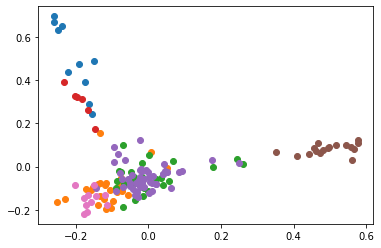

In [ ]:


#filter rows of original data
filtered_label0 = PCA_components[label2 == 0]
filtered_label1 = PCA_components[label2 == 1]
filtered_label2 = PCA_components[label2 == 2]
filtered_label3 = PCA_components[label2 == 3]
filtered_label4 = PCA_components[label2 == 4]
filtered_label5 = PCA_components[label2 == 5]
filtered_label6 = PCA_components[label2 == 6]
filtered_label7 = PCA_components[label2 == 7]
filtered_label8 = PCA_components[label2 == 8]
filtered_label9 = PCA_components[label2 == 9]
#plotting the results of individual clusters meaning. This plot is not representative 
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1])
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1])
plt.scatter(filtered_label4.iloc[:,0] , filtered_label4.iloc[:,1])
plt.scatter(filtered_label5.iloc[:,0] , filtered_label5.iloc[:,1])
plt.scatter(filtered_label6.iloc[:,0] , filtered_label6.iloc[:,1])
plt.scatter(filtered_label7.iloc[:,0] , filtered_label7.iloc[:,1])
#plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1])

#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()

### Feature Reduction with t-SNE

WHAT t-SNE does?

/databricks/python/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
 warnings.warn(
[t-SNE] Computing 148 nearest neighbors...
[t-SNE] Indexed 149 samples in 0.001s...
[t-SNE] Computed neighbors for 149 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 0.327385
[t-SNE] KL divergence after 250 iterations with early exaggeration: 152.509384
[t-SNE] KL divergence after 1000 iterations: 1.693318

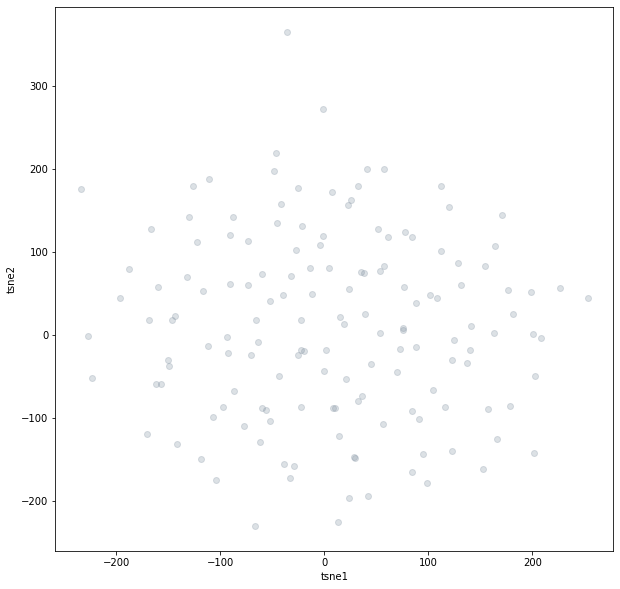

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000, learning_rate=300)
tsne_scale_results = tsne.fit_transform(array)
tsne_df_scale = pd.DataFrame(tsne_scale_results)
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,1],tsne_df_scale.iloc[:,2],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c90700>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c90700>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c90700>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c90700>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c90700>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.ge

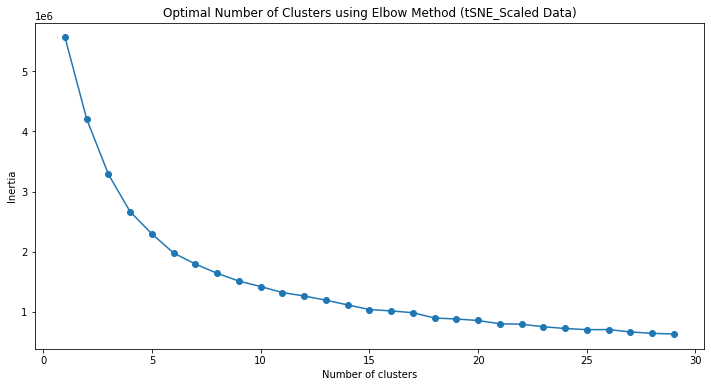

Text(0, 0.5, 'Inertia')

In [ ]:
sse = []
k_list = range(1, 30)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,30), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:

kmeans_tsne_scale = KMeans(n_clusters=7, n_init=100, max_iter=1000, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.22998595237731934

In [ ]:
label3 = kmeans_tsne_scale.predict(tsne_df_scale)
print("For each document what class are they into : \n",label3)

count_arr2 = np.bincount(label3)
print(count_arr2)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f7066c721f0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
For each document what class are they into : 
 [3 0 5 0 6 6 0 0 5 2 5 5 5 2 1 1 2 2 2 2 3 4 6 6 2 6 4 4 2 0 4 5 1 6 5 2 0
 4 0 0 1 0 6 6 4 0 1 0 0 1 2 4 5 6 4 5 2 4 6 1 0 5 6 5 5 3 0 2 3 2 0 2 3 4
 1 4 6 5 4 1 0 5 6 5 4 6 3 3 3 3 3 3 3 3 1 3 0 4 1 4 5 4 6 3 1 4 2 0 1 5 2
 2 1 5 6 0 0 1 6 4 5 2 4 5 4 4 2 6 2 5 0 3 4 4 2 5 5 0 2 2 1 3 2 6 1 5 2 0
 5]
[23 17 25 17 23 25 19]

In [ ]:
for i in range(0,4):
   print("for the class {} :".format(i) ,CountingForClass(i,label3), "\n")

for the class 0 : {'you': 215, 'symbol': 92, 'free': 60, 'spin': 54, 'prize': 45, 'reel': 41, 'play': 39, 'like': 31, 'mode': 30, 'wild': 29, 'bonus': 27, 'line': 26, 'winning': 26, 'button': 26, 'three': 24, 'screen': 23, 'waiting': 22, 'win': 21, 'figure': 21, 'bet': 21, 'try': 18, 'video': 18, 'special': 18, 'two': 18, 'enter': 17, 'combination': 17, 'powerful': 16, 'card': 16, 'fa': 16, 'diamond': 14, 'able': 14, 'spell': 14, 'blackjack': 14, 'player': 13, 'online': 13, 'x': 13, 'bar': 12, 'double': 12, 'magic': 12, 'find': 12, 'appear': 11, 'alkemor': 11, 'position': 11, 'right': 11, 'roller': 11, 'fire': 10, 'great': 10, 'chance': 10, 'hand': 10, 'world': 10, 'go': 10, 'appears': 10, 'increase': 10, 'fun': 9, 'scatter': 9, 'combining': 9, 'value': 9, 'new': 9, 'level': 9, 'twin': 9, 'big': 9, 'robin': 9, 'hood': 9, 'five': 8, 'pay': 8, 'number': 8, 'reward': 8, 'tower': 8, 'coin': 8, 'make': 8, 'dragon': 8, 'croupier': 8, 'choose': 8, 'maximum': 8, 'see': 8, 'use': 8, 'left': 8, 'jungle': 8, 'upper': 8, 'counter': 8, 'board': 8, 'group': 8, 'stone': 8, 'spinfinity': 8, 'remember': 7, 'enjoy': 7, 'book': 7, 'activated': 7, 'skill': 7, 'top': 7, 'additional': 7, 'gem': 7, 'jar': 7, 'barrel': 7, 'mini': 7, 'give': 6, 'way': 6, 'help': 6, 'element': 6, 'trigger': 6, 'mighty': 6, 'without': 6, 'identical': 6, 'turn': 6, 'worth': 6, 'king': 6, 'row': 6, 'golden': 6, 'mute': 6, 'activate': 6, 'rich': 6, 'grant': 6, 'shooting': 6, 'giovanni': 6, 'apple': 6, 'phoenix': 6, 'gangster': 6, 'extra': 5, 'rise': 5, 'many': 5, 'cast': 5, 'third': 5, 'fantasy': 5, 'discover': 5, 'main': 5, 'goal': 5, 'going': 5, 'know': 5, 'unlock': 5, 'lose': 5, 'replace': 5, 'fill': 5, 'time': 5, 'except': 5, 'volume': 5, 'information': 5, 'set': 5, 'advance': 5, 'multiplier': 5, 'mean': 5, 'function': 5, 'love': 5, 'bigger': 5, 'bullet': 5, 'full': 5, 'throw': 5, 'ray': 5, 'panda': 5, 'different': 5, 'high': 5, 'jammin': 5, 'crazy': 5, 'catapult': 5, 'evil': 5, 'star': 4, 'highest': 4, 'let': 4, 'huge': 4, 'fortune': 4, 'classic': 4, 'beat': 4, 'point': 4, 'first': 4, 'rule': 4, 'european': 4, 'ranking': 4, 'decide': 4, 'score': 4, 'hit': 4, 'horizontal': 4, 'fall': 4, 'empty': 4, 'bomb': 4, 'feature': 4, 'possible': 4, 'land': 4, 'paytable': 4, 'exotic': 4, 'eastern': 4, 'option': 4, 'music': 4, 'awaits': 4, 'amount': 4, 'start': 4, 'allows': 4, 'java': 4, 'treasure': 4, 'lower': 4, 'sometimes': 4, 'japanese': 4, 'weapon': 4, 'best': 4, 'agent': 4, 'story': 4, 'warrior': 4, 'steel': 4, 'fight': 4, 'battle': 4, 'epic': 4, 'casual': 4, 'contiguous': 4, 'crush': 4, 'pop': 4, 'expand': 4, 'consists': 4, 'joker': 4, 'moon': 4, 'glow': 4, 'lava': 4, 'dinosaur': 4, 'volcano': 4, 'africa': 4, 'ash': 4, 'wine': 4, 'shoot': 4, 'mr': 4, 'laser': 4, 'destroy': 4, 'cristaltec': 3, 'random': 3, 'table': 3, 'blue': 3, 'need': 3, 'wizard': 3, 'water': 3, 'earth': 3, 'air': 3, 'one': 3, 'ruby': 3, 'item': 3, 'massive': 3, 'mysterious': 3, 'found': 3, 'good': 3, 'half': 3, 'initial': 3, 'available': 3, 'another': 3, 'either': 3, 'getting': 3, 'vertical': 3, 'disappear': 3, 'around': 3, 'part': 3, 'access': 3, 'crystal': 3, 'life': 3, 'never': 3, 'seen': 3, 'power': 3, 'dare': 3, 'would': 3, 'replaces': 3, 'along': 3, 'delight': 3, 'making': 3, 'view': 3, 'instruction': 3, 'located': 3, 'general': 3, 'indicator': 3, 'auto': 3, 'automatic': 3, 'back': 3, 'legendary': 3, 'wagon': 3, 'minigames': 3, 'used': 3, 'press': 3, 'accumulated': 3, 'wheel': 3, 'next': 3, 'anime': 3, 'fan': 3, 'culture': 3, 'unit': 3, 'crime': 3, 'entire': 3, 'center': 3, 'much': 3, 'academy': 3, 'drawing': 3, 'swordsman': 3, 'fantastic': 3, 'firework': 3, 'every': 3, 'multiply': 3, 'type': 3, 'combine': 3, 'fruit': 3, 'keep': 3, 'exciting': 3, 'paylines': 3, 'panel': 3, 'column': 3, 'african': 3, 'amazing': 3, 'crossbow': 3, 'welcome': 3, 'fairy': 3, 'villain': 3, 'fair': 3, 'slingshot': 3, 'dinos': 3, 'slotfather': 3, 'bos': 3, 'definition': 3, 'graphic': 3, 'dangerous': 3, 'already': 2, 'arrived

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 warnings.warn(

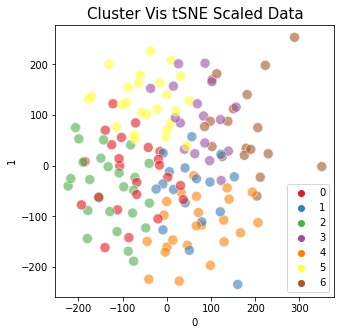

In [ ]:
plt.figure(figsize = (5,5))
sn.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()